# Классическое машинное обучение ML
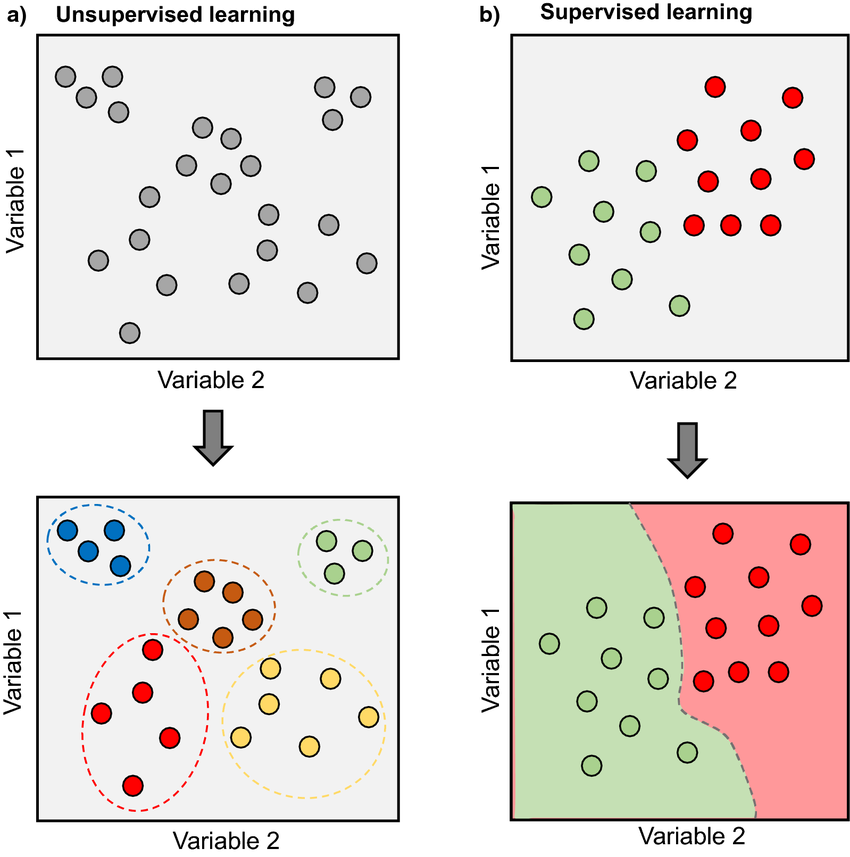
- **обучение с учителем 🧑**
- **обучение без учителя ❌ 🧑**

# Линейная регрессия

Линейная регрессия — это математическая модель, которая описывает связь между несколькими переменными. В частности, она используется для прогнозирования зависимой переменной на основе одной или нескольких других переменных (факторов) с линейной функцией зависимости.


## Формула линейной регрессии

$
y = w x + b
$

## Формула множественной линейной регрессии

$
y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$

В линейной регрессия  одна переменная (объясняемая или зависимая) зависит от другой или нескольких других переменных (факторов) с линейной функцией зависимости. Коэффициенты линейной регрессии показывают, как зависимая переменная меняется при изменении факторов, при условии, что остальные факторы остаются постоянными.




*   $y$ — зависимая переменная (выход)
*   $x$ — независимая переменная (вход)
*   $w_i$ — коэффициент наклона, вес (угол наклона прямой)
*   $b$ — свободный вес (смещение по вертикали)

Коэффициент $w$ определяет, насколько быстро меняется $y$ при изменении $x$, а $b$ задает начальное значение $y$ при $x = 0$


## Как находятся веса в линейной регрессии:


Метод наименьших квадратов (МНК) находит коэффициенты линейной регрессии, минимизируя сумму квадратов ошибок между предсказанными и реальными значениями.



$w = \frac{\sum_{i=1}^{m} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}$


Эта формула вычисляет угол наклона линии регрессии, основываясь на ковариации $x$ и $y$ и дисперсии $x$:

Числитель — ковариация $x$ и $y$ (насколько они изменяются вместе).

Знаменатель — дисперсия $x$ (разброс значений $x$ относительно среднего).

Если ковариация положительная → $w$ положительное (чем больше $x$, тем больше $y$).

Если ковариация отрицательная → $w$ отрицательное (при увеличении $x$ $y$ уменьшается).

**Свободный вес расчитывается по формуле:**

$b = \bar{y} - w \bar{x}$


## Пример расчета вручную

Допустим, у нас есть три точки:

$(1, 2), (2, 3), (3, 5)$

1.	Найдем средние значения:
$\bar{x} = \frac{1+2+3}{3} = 2, \quad \bar{y} = \frac{2+3+5}{3} = 3.33$

2.	Вычисляем $w$:

    $w = \frac{(1-2)(2-3.33) + (2-2)(3-3.33) + (3-2)(5-3.33)}{(1-2)^2 + (2-2)^2 + (3-2)^2}$

    $w = \frac{( -1 \cdot -1.33) + (0 \cdot -0.33) + (1 \cdot 1.67)}{(-1)^2 + 0^2 + 1^2}$

    $w = \frac{1.33 + 0 + 1.67}{1 + 0 + 1} = \frac{3}{2} = 1.5$

3.	Вычисляем $b$:

    $b = 3.33 - (1.5 \times 2) = 3.33 - 3 = 0.33$

Уравнение линейной регрессии:

$y = 1.5x + 0.33$









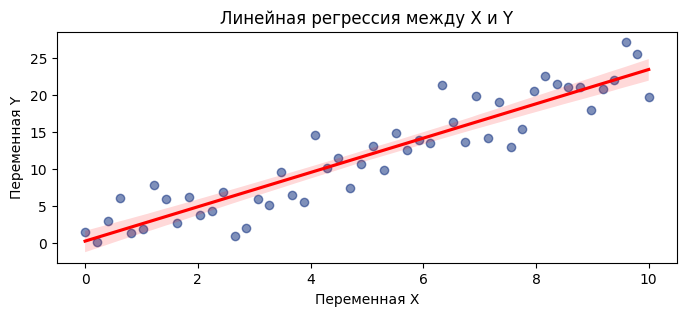

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
x = np.linspace(0, 10, 50)  # 50 значений от 0 до 10
y = 2.5 * x + np.random.normal(0, 3, size=50)  # Зависимость + шум
df = pd.DataFrame({'X': x, 'Y': y})

# Строим график с регрессионной линией и доверительным интервалом

# Доверительный интервал: если мы много раз строим линейную регрессию на разных подвыборках данных,
# то в 95% случаев истинная линия регрессии будет находиться внутри этого интервала.

plt.figure(figsize=(8, 3))
sns.regplot(x='X', y='Y', data=df, ci=95, scatter_kws={'color': '#002277', 'alpha':0.5}, line_kws={'color': 'red'})
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Линейная регрессия между X и Y')

plt.show()

# Применение регуляризаций $L1 - Lasso$  , $L2 - Ridge$

Регуляризация используется для борьбы с переобучением. Она добавляет штраф к функции потерь, уменьшая влияние малозначимых коэффициентов.

## 1️⃣ L1-регуляризация (Lasso, Least Absolute Shrinkage and Selection Operator)

🔹 В L1-регуляризации к функции потерь добавляется сумма абсолютных значений коэффициентов.

🔹 Это приводит к тому, что некоторые коэффициенты становятся равны нулю → функция автоматически выбирает важные признаки.

🔹 Используется в Lasso-регрессии.

🔹 Формула L1-регуляризации:

$J(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}i)^2 + \lambda \sum{j=1}^{p} |\theta_j|$

где:

- $J(\theta)$ — функция потерь (MSE с регуляризацией)

- $\lambda$ — коэффициент регуляризации (чем выше, тем больше коэффициенты обнуляются)

- $\sum_{j=1}^{p} |\theta_j|$ — сумма абсолютных значений весов


🔥 Свойства L1-регуляризации:

✅ Автоматический отбор признаков (фильтрует ненужные)

❌ Может быть нестабильной при высокой корреляции признаков

---

## 2️⃣ L2-регуляризация (Ridge, Tikhonov Regularization)

🔹 В L2-регуляризации к функции потерь добавляется сумма квадратов коэффициентов.

🔹 Это приводит к уменьшению всех коэффициентов, но не делает их нулевыми.

🔹 Используется в Ridge-регрессии.

🔹 Формула L2-регуляризации:

$J(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}i)^2 + \lambda \sum{j=1}^{p} \theta_j^2$

где:

•	$\sum_{j=1}^{p} \theta_j^2$ — сумма квадратов коэффициентов



**🔥 Свойства L2-регуляризации:**

✅ Сглаживает модель

✅ Лучше работает, если признаки коррелируют

❌ Не зануляет коэффициенты, не делает отбор признаков


#Метрики

**1. Среднеквадратичная ошибка (MSE, Mean Squared Error)**

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

-	Показывает средний квадрат отклонений предсказанных значений $\hat{y}_i$ от реальных $y_i$.

-	Чем меньше, тем лучше.
---

**2. Корень из среднеквадратичной ошибки (RMSE, Root Mean Squared Error)**

$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

Интерпретируется в тех же единицах, что и целевая переменная.

---


**3. Коэффициент детерминации ($R^2, R-squared$)**

$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$

-	Показывает, какую долю дисперсии зависимой переменной объясняет модель.
-   Чем ближе к 1, тем лучше.


**Плюсы $R^2$**


✅ Интуитивно понятен — показывает, какую долю изменчивости данных объясняет модель.

✅ Легко интерпретируется — значения от 0 до 1 позволяют сразу понять качество модели.


**Минусы $R^2$**

❌ Может быть высоким, даже если модель бесполезна
	•	Высокий $R^2$ не всегда означает хорошую предсказательную способность. Например, если модель переобучилась, $R^2$ может быть высоким, но на новых данных она работать не будет.

❌ Не учитывает количество признаков
	•	Если добавить в модель бесполезные переменные, $R^2$ не уменьшится, а может даже увеличиться. Это приводит к ложному ощущению улучшения модели.

---

**Альтернативы $R^2$**

Скорректированный коэффициент детерминации ($R^2_{adj}$)

Используется, если у модели много признаков, так как учитывает количество переменных:

$R^2_{adj} = 1 - \left( \frac{SS_{res} / (n - p - 1)}{SS_{tot} / (n - 1)} \right)$

где $p$ — число предикторов, $n$ — число наблюдений.

✅ Уменьшается, если добавленный признак не улучшает модель.

---

**4. Средняя абсолютная ошибка (MAE)**

$MAE = \frac{1}{n} \sum |y_i - \hat{y}_i|$

✅ Менее чувствителен к выбросам, чем MSE.


# Полиномиальная регрессия

Полиномиальная регрессия — метод, который используется для моделирования отношений между переменными, но в отличие от линейной регрессии, он учитывает не только прямую линейную зависимость, но и более сложные нелинейные отношения.

Например, вместо простой прямой линии (где $у$ нас есть только $x$ и $y$), мы можем использовать полиномиальную регрессию для создания кривой или параболы, добавляя квадратичные ($x^2$), кубические ($x^3$) или более высокие степени ($x^n$) переменной $x$.

## **Создание модели линейной регресии на примере датасета Boston Housing**

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Описание датасета Boston Housing
* Коэффициент преступности на душу населения города (CRIM)
* Доля жилой земли, зонированной под участки более 25,000 кв. футов (ZN)
* Доля нерозничных бизнес-площадей на город (INDUS)
* Фиктивная переменная Чарльз-Ривер (= 1, если участок граничит с рекой; 0 в противном случае) (CHAS)
* Концентрация оксидов азота (NOX) (частей на 10 миллионов)
* Среднее количество комнат на жилое помещение (RM)
* Доля занятых владельцами единиц, построенных до 1940 года (AGE)
* Взвешенные расстояния до пяти бостонских центров занятости (DIS)
* Индекс доступности радиальным магистралям (RAD)
* Ставка налога на недвижимость в размере полной стоимости за 10,000 (TAX)
* Соотношение учеников и учителей по городам (PTRATIO)
* 1000(Bk - 0.63)^2, где Bk - доля чернокожих по городам (B)
* Процент населения с более низким статусом (LSTAT)
* Медианная стоимость домов, занятых владельцами, в $1000 (MEDV)



In [4]:
boston = fetch_openml(name="boston", as_frame=True, version=1)
df = boston.frame
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


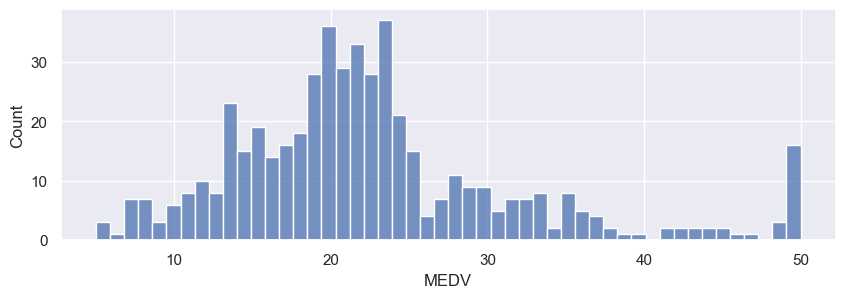

In [7]:
sns.set(rc={'figure.figsize': (10,3)})
sns.histplot(df['MEDV'], bins=50)
plt.show()

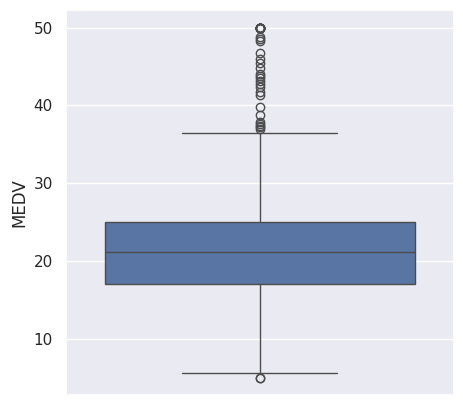

In [ ]:
sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(df['MEDV'])
plt.show()

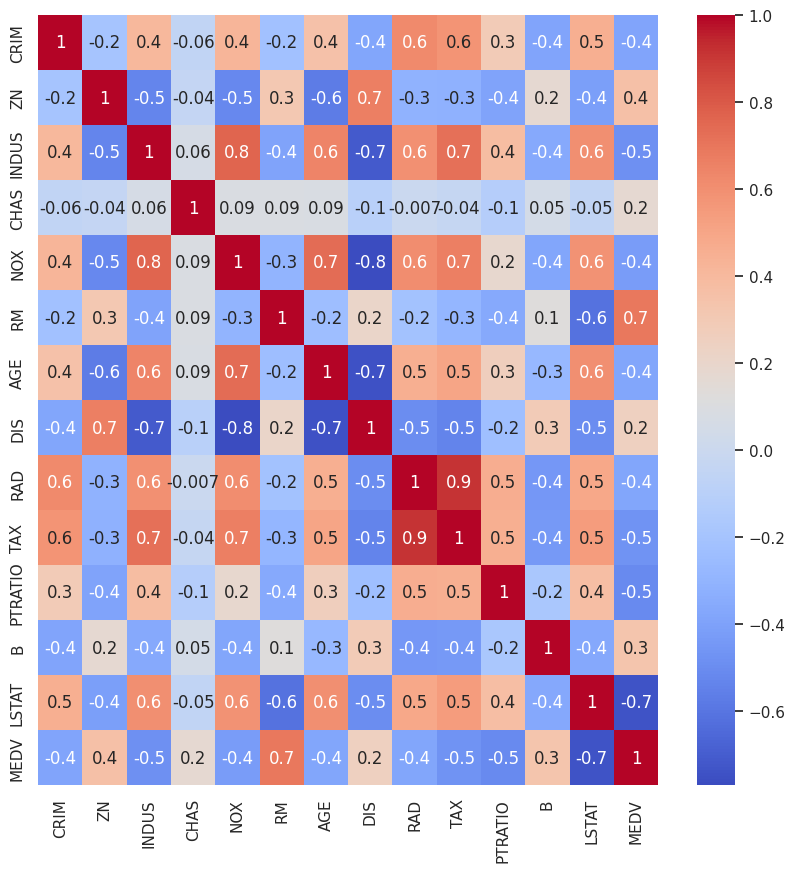

In [ ]:
sns.set(rc={'figure.figsize': (10,10)})
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1g')
plt.show()

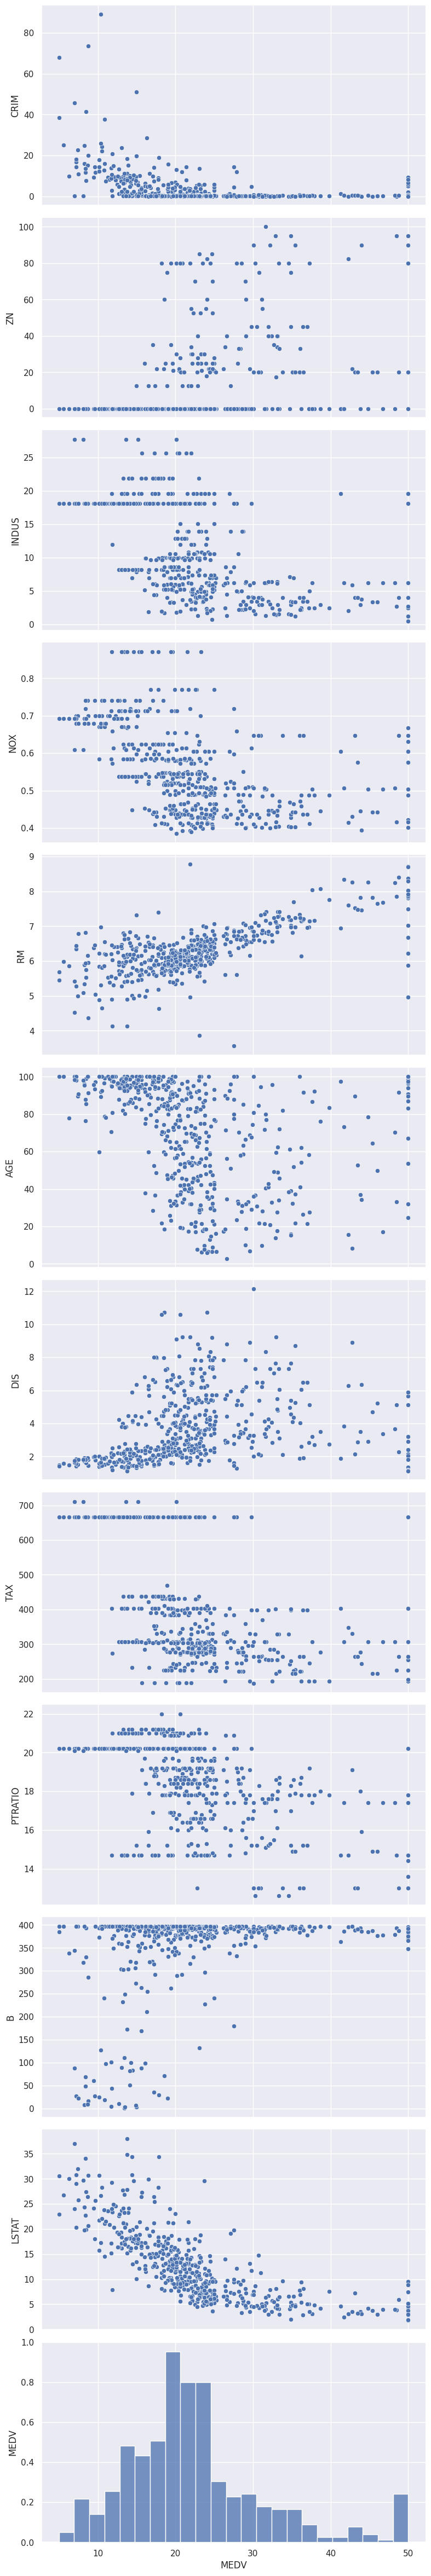

In [ ]:
sns.pairplot(df, x_vars=['MEDV'], height=4, aspect=2)
plt.show()

In [ ]:
df = df[df["MEDV"] < 50]
df = df.drop(columns=["NOX", "RAD", "CHAS"],  axis=1)
df

,CRIM,ZN,INDUS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


X = df.drop("MEDV", axis=1) # наблюдения по признакам
y = df["MEDV"] # метки

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 10), (98, 10), (392,), (98,))

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# model = LinearRegression()
# model = Lasso(alpha=0.1)
model = Ridge(alpha=0.7)


In [ ]:
model.fit(X_train, y_train)

Ridge(alpha=0.7)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'R2 train: {r2_train}')
print(f'R2 test: {r2_test}')
print(f'MSE train: {mse_train}')
print(f'MSE test: {mse_test}')
print(f'RMSE train: {rmse_train}')
print(f'RMSE test: {rmse_test}')
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')

R2 train: 0.9153933140748152
R2 test: 0.8572103212479226
MSE train: 5.036871574340585
MSE test: 10.026610510197068
RMSE train: 2.2442975681358712
RMSE test: 3.1664823558954294
MAE train: 1.6575347260483912
MAE test: 2.0328105324934804
